# Diplomado de Ciencia de datos avanzado
# Trabajo final
# Curso: Estadística para ciencia de datos

# 1. Caso de estudio
App Salud es un tipo de asociación público-privada, en la cual el estado peruano sede la gestión de una entidad de salud a una empresa privada, con la finalidad de poder incrementar la calidad de la atención de los pacientes, mejorar las instalaciones y ser más eficientes en el uso de los recursos.

El estado peruano sigue siendo el principal auditor de las actividades que realice la empresa privada que gestiona el hospital. Para ello, una manera de validar que los objetivos se están cunmpliendo es a través de la encuesta de satisfacción que debe realizar el operador privado y rendir los resultados ante el estado peruano. Para renovar el contrato, el estado exige que la satisfacción general de los pacientes que se hayan atendido en algunos de los servicios que brinda el hospital sea mayor al 80%

Los dos hospitales bajo esta modalidad de APP son: EsSalud Alberto Barton (Callao) y Guillermo Kaelin (Villa María del Triunfo-Lima).


# 2. Planteamiento del problema y objetivos

El estado exige que la satisfacción general de los pacientes que se hayan atendido en algunos de los servicios que brinda el hospital sea mayor al 80%. Por lo tanto, se necesita realizar un análisis de los datos de satisfacción de los pacientes para determinar  cuales son las principales variables que influyen en la satisfacción de los pacientes y poder plantear recomendaciones en función a dichas variables para elevar el nivel de satisfacción de los pacientes.

## 2.1 Objetivo general 
- Evaluar si la satisfacción general de los pacientes supera el 80% exigido por el Estado peruano en el área de hospitalización quirúrgica del hospital EsSalud Alberto Barton.

- Identificar los factores más importantes que influyen en la satisfacción de los pacientes del área de hosiptalización quirúrgica del hospital Barton.

## 2.2 Objetivos específicos 
Identificar los principales factores que influyen según el sexo de los pacientes. 


# 3. Diseño del Estudio
- Población de interés: Pacientes atendidos en el área de hospitalización quirúrgica del hospital Kaeli.
- Variable dependiente: Satisfacción general 
- Variables independientes: Factores potenciales que influyen en la satisfacción (ejemplo: caso, edad, rango_edad, variables de satisfacción específicas, etc.), incluyendo el sexo como variable clave. 
- Notas: Se debe verificar que para la variable tipo de hospitalización, el 3 (parto) concuerde que el sexo sea mujer. También, la edad debe coincidir con el rango de edad.

# 4. Procesamiento

4.1 Importación de datos

In [1]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Escalamiento de variables
from sklearn.preprocessing import MinMaxScaler

In [2]:
raw_data = pd.read_excel("./DATA DE SATISFACCIÓN HOSPITAL APP_SESIÓN 03.xlsx", 
                         sheet_name = "SAT HOSP_FEATURE")

- Filtrar para el hospital Barton

In [3]:
# Filtrar
raw_data["hospital"].value_counts()

hospital
2    345
1    341
Name: count, dtype: int64

In [4]:
raw_data = raw_data[raw_data["hospital"] == 1]

In [5]:
# Variables
raw_data.columns

Index(['caso', 'sexo', 'edad', 'rango_edad', 'hospital', 'sat_general', 'sat1',
       'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'medicion',
       'N_días_hosp', 'Procedencia', 'Tipo_hospitalización'],
      dtype='object')

In [6]:
raw_data.drop(columns = ["hospital"], inplace = True)

In [7]:
# Revisar los tipos de variables
print( "Filas: ", raw_data.shape[0])  
print( "Columnas: ", raw_data.shape[1]) 

Filas:  341
Columnas:  17


In [8]:
# Revisar los tipos de variables y la cantidad de valores nulos
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 685
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   caso                  341 non-null    int64  
 1   sexo                  327 non-null    float64
 2   edad                  336 non-null    float64
 3   rango_edad            340 non-null    float64
 4   sat_general           341 non-null    int64  
 5   sat1                  341 non-null    int64  
 6   sat2                  341 non-null    int64  
 7   sat3                  341 non-null    int64  
 8   sat4                  341 non-null    int64  
 9   sat5                  341 non-null    int64  
 10  sat6                  341 non-null    int64  
 11  sat7                  341 non-null    int64  
 12  sat8                  341 non-null    float64
 13  medicion              341 non-null    int64  
 14  N_días_hosp           341 non-null    int64  
 15  Procedencia           341 no

In [9]:
raw_data.describe()

,caso,sexo,edad,rango_edad,sat_general,sat1,sat2,sat3,sat4,sat5,sat6,sat7,sat8,medicion,N_días_hosp,Procedencia,Tipo_hospitalización
count,341.000000,327.000000,336.000000,340.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,19800.395894,1.529052,36.949405,2.614706,3.882698,4.240469,4.096774,4.240469,4.357771,4.170088,4.008798,3.158358,4.343109,3.495601,24.401760,1.225806,1.865103
std,1330.619687,0.499920,9.448389,0.835295,1.004853,0.715956,0.853723,0.782683,0.707838,0.917373,0.879461,1.147182,5.179387,0.500715,12.469251,0.418727,0.689831
min,17831.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,18641.000000,1.000000,31.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,3.000000,15.000000,1.000000,1.000000
50%,19454.000000,2.000000,36.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,24.000000,1.000000,2.000000
75%,20977.000000,2.000000,41.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,35.000000,1.000000,2.000000
max,21833.000000,2.000000,75.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,98.000000,4.000000,45.000000,2.000000,3.000000


In [10]:
raw_data.columns[raw_data.isnull().any()].tolist()

['sexo', 'edad', 'rango_edad']

In [11]:
# Se elimina la variable caso por ser un identificador
raw_data.drop(columns = ['caso'], inplace = True)

## 4.1 Tratamiento de valores nulos

- Se analizan los valores faltantes por variable y se realiza la imputación correspondiente. Las variables que presentan valores faltantes son: ['sexo', 'edad', 'rango_edad', 'sat8'].
- Notas: Se debe verificar que para la variable tipo de hospitalización, el 3 (parto) concuerde que el sexo sea mujer. También, la edad debe coincidir con el rango de edad.
- Los nombres de las columnas son: ['sexo', 'edad', 'rango_edad', 'hospital', 'sat_general', 'sat1',
       'sat2', 'sat3', 'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'medicion','N_días_hosp', 'Procedencia', 'Tipo_hospitalización']

In [12]:
# Supongamos que la columna específica 
filas_con_nulos = raw_data[raw_data['sexo'].isnull()]
print(filas_con_nulos[["sexo", "Tipo_hospitalización"]])


     sexo  Tipo_hospitalización
1     NaN                     2
129   NaN                     2
137   NaN                     2
161   NaN                     2
167   NaN                     2
169   NaN                     2
174   NaN                     2
177   NaN                     1
464   NaN                     2
471   NaN                     1
484   NaN                     2
500   NaN                     1
552   NaN                     1
556   NaN                     3


In [13]:
# Para el tipo de hospitalización 3 (parto), se asume que el sexo es 2 (mujer)
raw_data.loc[(raw_data["Tipo_hospitalización"] == 3) & (raw_data["sexo"].isna()), "sexo"] = 2

- Se revisa la cantidad de personas según sexo y tipo de hospitalización para realizar la imputación
- Se observa que hay una mayor cantidad de hombres en el tipo de hospitalización 2, por lo que se imputa el valor de sexo hombre para los valores faltantes de la variable sexo en el tipo de hospitalización 2.
- Se observa que hay una mayor cantidad de hombres en el tipo de hospitalización 1, por lo que se imputa el valor de sexo hombre para los valores faltantes de la variable sexo en el tipo de hospitalización 1. 

In [14]:
# Se revisa la moda
raw_data.groupby(['Tipo_hospitalización', 'sexo']).size().reset_index(name='conteo')

,Tipo_hospitalización,sexo,conteo
0,1,1.0,46
1,1,2.0,57
2,2,1.0,108
3,2,2.0,56
4,3,2.0,61


In [15]:
# Imputación con la moda
raw_data.loc[(raw_data["Tipo_hospitalización"] == 1) & (raw_data["sexo"].isna()), "sexo"] = 1
raw_data.loc[(raw_data["Tipo_hospitalización"] == 2) & (raw_data["sexo"].isna()), "sexo"] = 1

In [16]:
# Se verifica que no haya valores nulos
raw_data[raw_data['sexo'].isnull()].shape[0]

0

In [17]:
# Edad y rango de edad
filas_con_nulos = raw_data[raw_data['edad'].isnull()]
print(filas_con_nulos[["edad", "rango_edad"]])

     edad  rango_edad
1     NaN         NaN
6     NaN         2.0
8     NaN         4.0
327   NaN         2.0
331   NaN         2.0


In [18]:
# Se revisa la mediana de las edades por rango de edad

rango_edad_stats = raw_data[['rango_edad', 'edad']].groupby("rango_edad" , 
                                                            as_index = False).agg(['mean', 
                                                                                   "median",
                                                                                   'count'])
                                

In [19]:
rango_edad_stats = rango_edad_stats[[('rango_edad', ''),('edad', 'median')]]
print(rango_edad_stats)

  rango_edad   edad
             median
0        1.0   24.0
1        2.0   31.0
2        3.0   39.0
3        4.0   52.0


In [20]:
edad_median = raw_data["edad"].median()
print(edad_median)

36.0


In [21]:
# Imputando la mediana según rango de edad en los valores faltantes 
raw_data.loc[(raw_data["rango_edad"] == 2) & (raw_data["edad"].isna()), "edad"] = rango_edad_stats.iloc[1,1]
#raw_data.loc[(raw_data["rango_edad"] == 3) & (raw_data["edad"].isna()), "edad"] = rango_edad_stats.iloc[2,1]
raw_data.loc[(raw_data["rango_edad"] == 4) & (raw_data["edad"].isna()), "edad"] = rango_edad_stats.iloc[3,1]

In [22]:
# Imputando la mediana para la fila en la cual no se indicaba el rango de edad
# la mediana asiganda es de la data antes de la imputación de las edades
raw_data.loc[(raw_data["rango_edad"].isna()) & 
             (raw_data["edad"].isna()), "edad"] = edad_median
print(edad_median)

36.0


In [23]:
# Para la edad 36 corresponde el rango 3
print("Antes de la imputación")
print(raw_data.loc[(raw_data["rango_edad"].isna()),
                   ["edad", "rango_edad"]])

# Imputación
raw_data.loc[(raw_data["rango_edad"].isna()), 
             "rango_edad"] = 3

# Verificación de columnas con nulos
print("Columnas con nulos después de la imputación")
raw_data.columns[raw_data.isnull().any()].tolist()

Antes de la imputación
   edad  rango_edad
1  36.0         NaN
Columnas con nulos después de la imputación


[]

## 4.2 Análisis de valores atípicos

- De la revisión de los datos se observa que todas las variables a excepción de sat presentan valores entre 1 y 5. 
- La variable sat8 presenta un valor atípico que sería un error dado que la escala se encuentra del 1 al 5.
- Se debe tener en cuenta que las variables de satisfacción son variables cualitativas ordinales. 

In [24]:
raw_data.describe()

,sexo,edad,rango_edad,sat_general,sat1,sat2,sat3,sat4,sat5,sat6,sat7,sat8,medicion,N_días_hosp,Procedencia,Tipo_hospitalización
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,1.510264,36.938416,2.615836,3.882698,4.240469,4.096774,4.240469,4.357771,4.170088,4.008798,3.158358,4.343109,3.495601,24.401760,1.225806,1.865103
std,0.500629,9.430817,0.834327,1.004853,0.715956,0.853723,0.782683,0.707838,0.917373,0.879461,1.147182,5.179387,0.500715,12.469251,0.418727,0.689831
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,3.000000,15.000000,1.000000,1.000000
50%,2.000000,36.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,24.000000,1.000000,2.000000
75%,2.000000,41.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,35.000000,1.000000,2.000000
max,2.000000,75.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,98.000000,4.000000,45.000000,2.000000,3.000000


Gráfico de boxplot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4320\418991720.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),


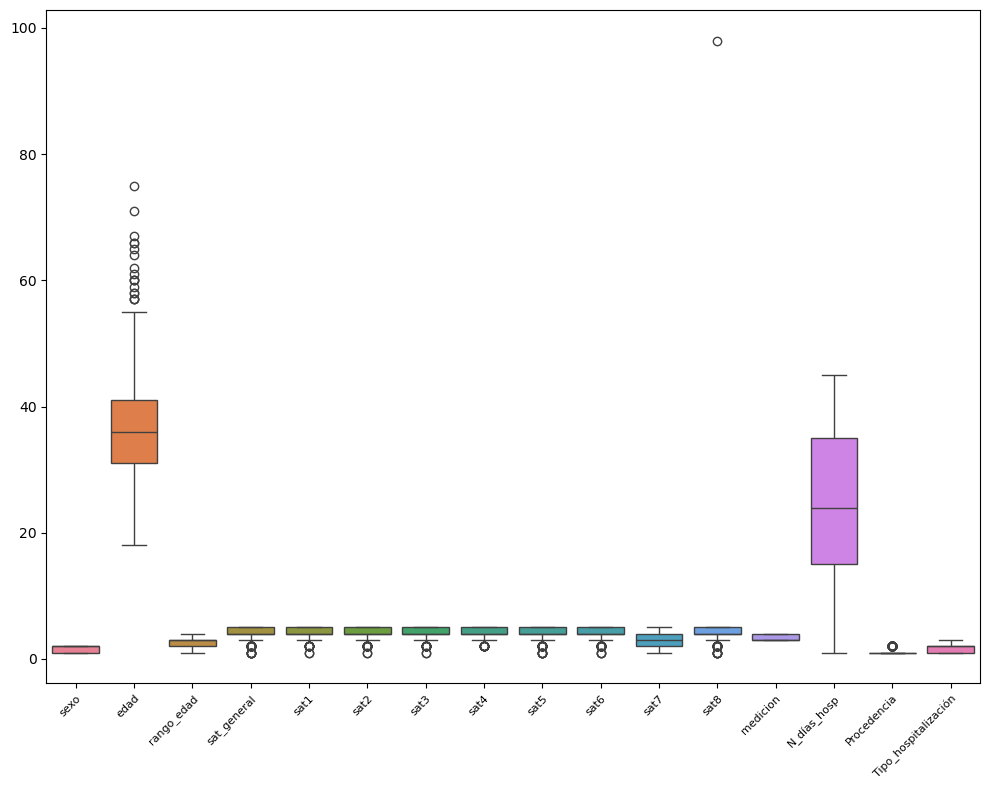

In [25]:
plt.figure(figsize=(10, 8))
plot = sns.boxplot(data = raw_data)

plot.set_xticklabels(plot.get_xticklabels(), 
                        rotation=45, 
                        horizontalalignment='right', 
                        fontsize=8, 
                        ha="right", 
                        rotation_mode='anchor', 
                        wrap=True)
# Displaying 
plt.tight_layout()
plt.show()


- Se observa que los datos de satisfacción se encuentran entre 4 y 5. 
- Así mismo, las demás variables presentan valores que se encuentran dentro de los rangos correctos. 
- Dado que solo la variable 8 muestra un dato atípico y las variables presentan valores plausibles, se procede a imputar asumiendo que corresponde a un valor ingresado incorrectamente. 
- La variable es cualitativa por lo que se reemplaza por la moda de la variable sat8.

In [26]:
raw_data[ raw_data["sat8"] == raw_data["sat8"].max()]

,sexo,edad,rango_edad,sat_general,sat1,sat2,sat3,sat4,sat5,sat6,sat7,sat8,medicion,N_días_hosp,Procedencia,Tipo_hospitalización
0,1.0,43.0,3.0,4,4,5,5,5,4,4,4,98.0,3,8,2,2


In [27]:
sat8_moda = raw_data["sat8"].mode().iloc[0]

In [28]:
raw_data.loc[raw_data["sat8"] == raw_data["sat8"].max(), 
             "sat8"] = sat8_moda

In [29]:
raw_data["sat8"].describe()

count    341.000000
mean       4.067449
std        0.975356
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: sat8, dtype: float64

## 4.3 Escalamiento de variables
- Se realiza el escalamiento sobre variables cuantitativas: edad y número de días de hospitalización

In [30]:
# Supongamos que la columna que deseas escalar se llama 'nombre_columna'
scaler_edad = MinMaxScaler()

# Ajustar y transformar los datos
raw_data['edad_escalada'] = scaler_edad.fit_transform(raw_data[['edad']])

print(raw_data[['edad', 'edad_escalada']])

     edad  edad_escalada
0    43.0       0.438596
1    36.0       0.315789
2    49.0       0.543860
6    31.0       0.228070
8    52.0       0.596491
..    ...            ...
681  32.0       0.245614
682  55.0       0.649123
683  23.0       0.087719
684  34.0       0.280702
685  27.0       0.157895

[341 rows x 2 columns]


In [31]:
# Supongamos que la columna que deseas escalar se llama 'nombre_columna'
scaler_dias_hospital = MinMaxScaler()

# Ajustar y transformar los datos
raw_data['N_dias_hosp_escalada'] = scaler_dias_hospital.fit_transform(raw_data[['N_días_hosp']])

print(raw_data[['N_días_hosp', 'N_dias_hosp_escalada']])

     N_días_hosp  N_dias_hosp_escalada
0              8              0.159091
1              1              0.000000
2             15              0.318182
6             23              0.500000
8             37              0.818182
..           ...                   ...
681           26              0.568182
682           25              0.545455
683           17              0.363636
684           16              0.340909
685           44              0.977273

[341 rows x 2 columns]


In [32]:
# Datos con tratamiento de valores nulos, atípicos y con escalamiento de las variables
data_procesada = raw_data.copy()

# 5. Análisis del nivel de satisfacción
- De acuerdo a la escala de Likert que va del 1 al 5, solo 4 y 5 indican satisfacción por parte del encuestado. 
- Se desea analizar cual es el porcentaje actual de satisfacción sobre la muestra. Para ello se genera una variable "satisfacción" a partir de la satisfacción general, que reclasifica la escala de Likert, de 1 a 3 como 0 que refiere a no satisfecho, y de 4 a 5 como 1 que refiere a satisfecho.

In [33]:
nivel_satisfaccion = data_procesada.copy()

In [34]:

# Definimos un diccionario de mapeo
mapeo_satisfaccion = {
    1: 0,
    2: 0,
    3: 0,
    4: 1, # Satisfecho
    5: 1  # Satisfecho
}

nivel_satisfaccion.loc[:,'sat_general_reclasificada'] = nivel_satisfaccion["sat_general"].map(mapeo_satisfaccion)

print(nivel_satisfaccion[["sat_general", 'sat_general_reclasificada']])

     sat_general  sat_general_reclasificada
0              4                          1
1              5                          1
2              5                          1
6              5                          1
8              5                          1
..           ...                        ...
681            1                          0
682            1                          0
683            1                          0
684            1                          0
685            1                          0

[341 rows x 2 columns]


In [35]:
nivel_satisfaccion["sat_general_reclasificada"].value_counts()
print("Porcentaje de los encuestados que se encuentran satisfechos")
nivel_satisfaccion["sat_general_reclasificada"].value_counts()[1]/nivel_satisfaccion.shape[0]*100


Porcentaje de los encuestados que se encuentran satisfechos


76.24633431085044

- El porcentaje de satisfacción en la muestra de la personas hospitalizadas del hospital EsSalud Alberto Barton se encuentra por debajo del 80%, por lo que es necesario determinar las variables que tienen una mayor influencia sobre la satisfacción general para alcanzar el objetivo. 

# 6. Análisis de la influencia de las variables sobre la satisfacción
- Se emplea el método de "weight of evidence" e "information value" para determinar las variables relevantes para la explicación de la satisfacción general.
- Para la aplicación del método se transforma la variable satisfacción general en una variable binaria, donde 1 refiere a satisfacción y 0 a insatisfacción.

### Information Values & Weight of Evidence
El análisis de relevancia de atributo evalúa el impacto de los valores de atributo en la variable objetivo. Ayuda a reconocer las variables más importantes que tienen el mayor impacto en la variable objetivo y a comprender las relaciones y la lógica entre los predictores más importantes y la variable objetivo.

El valor de la información (IV) y el peso de la evidencia (WOE) son técnicas simples y poderosas para realizar análisis de relevancia de atributos. Proporcionan un gran marco para el análisis exploratorio.

#### Information Values

El valor de información proporciona una medida de qué tan bien una variable X es capaz de distinguir entre una respuesta binaria (por ejemplo, "bueno" versus "malo") en alguna variable de destino Y. La idea es que si una variable X tiene un valor de información bajo, puede no hace un trabajo suficiente de clasificación de la variable de destino y, por lo tanto, se elimina como una variable explicativa.

#### Weight of Evidence

El peso de la evidencia indica el poder predictivo de una variable independiente en relación con la variable dependiente. .

##### Interpretacion de IV
- < 0.02 -> Malo para predicciones

- 0.02 - 0.1 -> Predictor debil

- 0.1 - 0.3 -> Predictor medio

- 0.3 - 0.5 -> Predictor Fuerte

- '> 0.5 -> Sospechoso o muy buen predictor

In [36]:
#import pandas as pd
#import numpy as np

def calcular_woe_iv(data, variable, target):
    # Crear una tabla de frecuencias
    tabla_frecuencias = pd.crosstab(data[variable], data[target])
    
    # Calcular la distribución de buenos y malos
    tabla_frecuencias['Distribución de buenos'] = tabla_frecuencias[0] / tabla_frecuencias[0].sum()
    tabla_frecuencias['Distribución de malos'] = tabla_frecuencias[1] / tabla_frecuencias[1].sum()
    
    # Calcular el WoE
    tabla_frecuencias['WoE'] = np.log(tabla_frecuencias['Distribución de buenos'] / tabla_frecuencias['Distribución de malos'])
    
    # Calcular el IV
    tabla_frecuencias['IV'] = (tabla_frecuencias['Distribución de buenos'] - tabla_frecuencias['Distribución de malos']) * tabla_frecuencias['WoE']
    iv_total = tabla_frecuencias['IV'].sum()
    
    return iv_total

def interpretar_iv(iv):
    if iv < 0.02:
        return "Malo para predicciones"
    elif iv < 0.1:
        return "Predictor débil"
    elif iv < 0.3:
        return "Predictor medio"
    elif iv < 0.5:
        return "Predictor fuerte"
    else:
        return "Sospechoso o muy buen predictor"

def calcular_iv_para_varias_variables(data, variables, target):
    iv_values = {}
    for variable in variables:
        iv = calcular_woe_iv(data, variable, target)
        iv_values[variable] = iv
    
    iv_df = pd.DataFrame(list(iv_values.items()), columns=['Variable', 'IV'])
    iv_df['Interpretación'] = iv_df['IV'].apply(interpretar_iv)
    return iv_df



In [37]:
nivel_satisfaccion.columns

Index(['sexo', 'edad', 'rango_edad', 'sat_general', 'sat1', 'sat2', 'sat3',
       'sat4', 'sat5', 'sat6', 'sat7', 'sat8', 'medicion', 'N_días_hosp',
       'Procedencia', 'Tipo_hospitalización', 'edad_escalada',
       'N_dias_hosp_escalada', 'sat_general_reclasificada'],
      dtype='object')

In [38]:
# Ejemplo de uso
variables =['sexo', 'rango_edad',  
            'sat1', 'sat2', 'sat3',
       'sat4', 'sat5', 'sat6', 'sat7', 
       'sat8', 'medicion', 
       'Procedencia', 'Tipo_hospitalización',
       ]
target = 'sat_general_reclasificada'  # Reemplaza con el nombre de tu variable dependiente
iv_df = calcular_iv_para_varias_variables(nivel_satisfaccion, variables, target)
print(iv_df)

                Variable        IV                   Interpretación
0                   sexo  0.000115           Malo para predicciones
1             rango_edad  0.166495                  Predictor medio
2                   sat1       inf  Sospechoso o muy buen predictor
3                   sat2       inf  Sospechoso o muy buen predictor
4                   sat3  0.741315  Sospechoso o muy buen predictor
5                   sat4  0.124629                  Predictor medio
6                   sat5       inf  Sospechoso o muy buen predictor
7                   sat6  0.242420                  Predictor medio
8                   sat7  0.618889  Sospechoso o muy buen predictor
9                   sat8  0.590273  Sospechoso o muy buen predictor
10              medicion  0.001372           Malo para predicciones
11           Procedencia  0.004291           Malo para predicciones
12  Tipo_hospitalización  0.011202           Malo para predicciones


Análisis
- La mayoría de las variables de satisfacción específicas muestran un IV medio a fuerte, lo que indica que son variables relevantes para explicar la satisfacción general.
- La variable rango edad muestra una capacidad predictiva media, lo que indica que es relevante para explicar la satisfacción general.
- Sin embargo, la variable sexo, medición, procedencia y tipo de hospitalización no muestran una capacidad predictiva relevante para explicar la satisfacción general. Para verificar si existen diferencias en la satisfacción general según estas variables se realiza la prueba de chi cuadrado. 


**Prueba de Chi-cuadrado (\(\chi^2\))**
- **Descripción**: Esta prueba sigue siendo la opción principal. Evalúa si hay una diferencia significativa en las proporciones de la variable binaria entre las categorías del predictor nominal.
- **Cómo funciona**: Se construye una tabla de contingencia (filas = categorías del predictor nominal, columnas = 0 y 1 de la variable binaria) y se compara las frecuencias observadas con las esperadas bajo la hipótesis nula de no asociación.
- **Requisitos**:
  - Al menos 5 observaciones esperadas por celda. Si no se cumple, considera ajustar categorías o usar otra prueba.
  - Las categorías deben ser mutuamente excluyentes.
- **Ejemplo**: ¿El color favorito (rojo, azul, verde) está asociado con la compra de un producto (sí/no)?
- **Limitación**: Solo detecta asociación, no te dice qué categorías específicas difieren.


In [39]:
#import pandas as pd
from scipy.stats import chi2_contingency

### Función 1: Generar tabla de contingencia
def generar_tabla_contingencia(df, var_predictora, var_objetivo):
    """Genera una tabla de contingencia entre una variable predictora y la objetivo"""
    tabla_contingencia = pd.crosstab(df[var_predictora], df[var_objetivo])
    print(f"Tabla de contingencia ({var_predictora} vs {var_objetivo}):")
    print(tabla_contingencia)
    return tabla_contingencia

### Función 2: Realizar prueba de Chi-cuadrado
def realizar_prueba_chi2(tabla_contingencia):
    """Realiza la prueba de Chi-cuadrado y devuelve los resultados"""
    chi2, valor_p, grados_libertad, esperados = chi2_contingency(tabla_contingencia)
    return chi2, valor_p, grados_libertad, esperados

### Función 3: Mostrar resultados
def mostrar_resultados(chi2, valor_p, grados_libertad, esperados, var_predictora, var_objetivo):
    """Muestra los resultados de la prueba de Chi-cuadrado con nombres de variables"""
    print("\nResultados de la prueba de Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi2:.4f}")
    print(f"Valor p: {valor_p:.4f}")
    print(f"Grados de libertad: {grados_libertad}")
    print("\nFrecuencias esperadas:")
    print(esperados)

### Función 4: Interpretar resultados
def interpretar_resultados(valor_p, var_predictora, var_objetivo, alpha=0.05):
    """Interpreta los resultados según el valor p con nombres de variables"""
    if valor_p < alpha:
        print("\nConclusión: Hay evidencia suficiente para rechazar la hipótesis nula.")
        print(f"La variable predictora '{var_predictora}' y la variable objetivo '{var_objetivo}' están asociadas.")
    else:
        print("\nConclusión: No hay evidencia suficiente para rechazar la hipótesis nula.")
        print(f"No se detecta asociación entre '{var_predictora}' y '{var_objetivo}'.")

### Función 5: Verificar frecuencias esperadas
def verificar_frecuencias_esperadas(esperados):
    """Verifica si las frecuencias esperadas cumplen los requisitos"""
    if (esperados < 5).any():
        print("\nAdvertencia: Algunas frecuencias esperadas son menores a 5. Considera usar la prueba exacta de Fisher.")

### Función principal: Ejecutar análisis para múltiples variables predictoras
def analizar_chi2_multiples(df, vars_predictoras, var_objetivo):
    """Ejecuta la prueba de Chi-cuadrado para una o varias variables predictoras"""
    # Asegurarse de que vars_predictoras sea una lista, incluso si es una sola variable
    if isinstance(vars_predictoras, str):
        vars_predictoras = [vars_predictoras]
    
    # Iterar sobre cada variable predictora
    for var_predictora in vars_predictoras:
        print(f"\n=== Análisis para {var_predictora} vs {var_objetivo} ===")
        
        # Generar tabla de contingencia
        tabla_contingencia = generar_tabla_contingencia(df, var_predictora, var_objetivo)
        
        # Realizar prueba de Chi-cuadrado
        chi2, valor_p, grados_libertad, esperados = realizar_prueba_chi2(tabla_contingencia)
        
        # Mostrar resultados
        mostrar_resultados(chi2, valor_p, grados_libertad, esperados, var_predictora, var_objetivo)
        
        # Interpretar resultados
        interpretar_resultados(valor_p, var_predictora, var_objetivo)
        
        # Verificar frecuencias esperadas
        verificar_frecuencias_esperadas(esperados)


In [40]:
# Prueba de chi-cuadrado 
variable_objetivo = 'sat_general_reclasificada'
variables_predictoras = ['sexo', 'medicion',
                         'Procedencia',
                         'Tipo_hospitalización'] 
    
# Ejecutar el análisis
analizar_chi2_multiples(nivel_satisfaccion, 
                        variables_predictoras,
                        variable_objetivo)


=== Análisis para sexo vs sat_general_reclasificada ===
Tabla de contingencia (sexo vs sat_general_reclasificada):
sat_general_reclasificada   0    1
sexo                              
1.0                        40  127
2.0                        41  133

Resultados de la prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 0.0000
Valor p: 1.0000
Grados de libertad: 1

Frecuencias esperadas:
[[ 39.6686217 127.3313783]
 [ 41.3313783 132.6686217]]

Conclusión: No hay evidencia suficiente para rechazar la hipótesis nula.
No se detecta asociación entre 'sexo' y 'sat_general_reclasificada'.

=== Análisis para medicion vs sat_general_reclasificada ===
Tabla de contingencia (medicion vs sat_general_reclasificada):
sat_general_reclasificada   0    1
medicion                          
3                          42  130
4                          39  130

Resultados de la prueba de Chi-cuadrado:
Estadístico Chi-cuadrado: 0.0268
Valor p: 0.8699
Grados de libertad: 1

Frecuencias esperadas:
[[ 40.85

- De acuerdo con las pruebas estadísticas chi cuadrado entre las variables sexo, medición, procedencia y tipo de hospitalización con la satisfacción general, se observa que no existe una asociación significativa entre estas variables y la satisfacción general. 

## Análisis de la relación de variables cuantitativas sobre la satisfacción (binaria)


**Prueba t de Student (o Mann-Whitney U si no es normal)**
   - **Cuándo usarla**: Si quieres comparar los valores de la variable cuantitativa entre los dos grupos definidos por la variable binaria (por ejemplo, edad promedio de quienes compran vs. no compran).
   - **Hipótesis**:
     - \( H_0 \): No hay diferencia en la media (o distribución) de la variable cuantitativa entre los grupos.
     - \( H_1 \): Hay diferencia.
   - **Requisitos**:
     - Prueba t: Normalidad en ambas distribuciones (usa Shapiro o Kolmogorov-Smirnov para verificar).
     - Mann-Whitney U: No requiere normalidad, ideal para datos no paramétricos.
   - **Limitación**: Solo indica si hay diferencia, no modela la relación.



<Axes: xlabel='sat_general_reclasificada', ylabel='edad'>

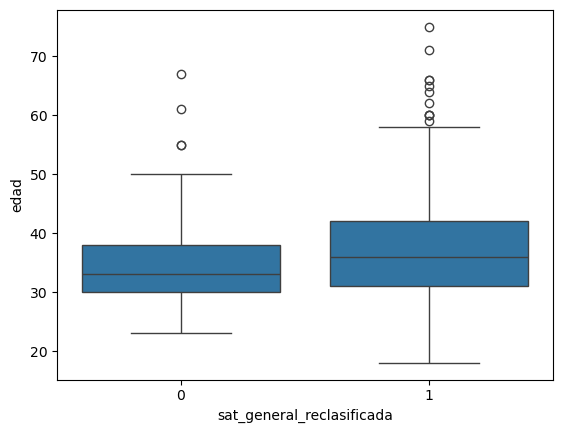

In [41]:
sns.boxplot(x = 'sat_general_reclasificada', y = 'edad', data = nivel_satisfaccion)

<Axes: xlabel='sat_general', ylabel='edad'>

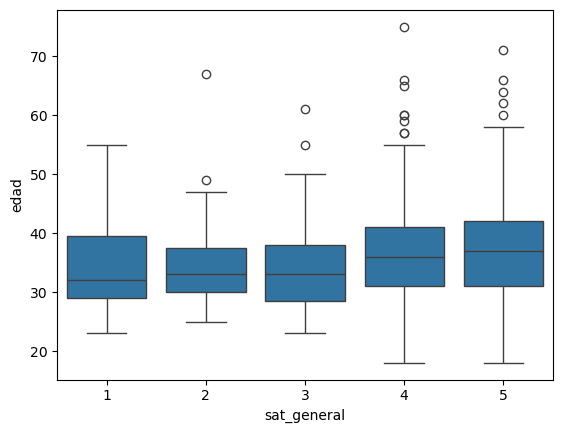

In [42]:
sns.boxplot(x = 'sat_general', y = 'edad', data = nivel_satisfaccion)

<Axes: xlabel='sat_general_reclasificada', ylabel='N_días_hosp'>

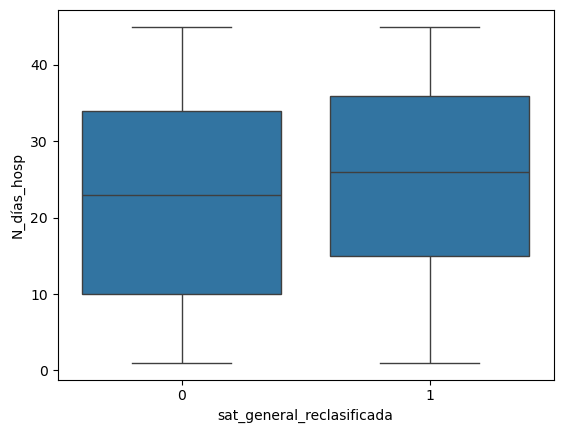

In [43]:
sns.boxplot(x = 'sat_general_reclasificada', y = 'N_días_hosp', data = nivel_satisfaccion)

<Axes: xlabel='sat_general', ylabel='N_días_hosp'>

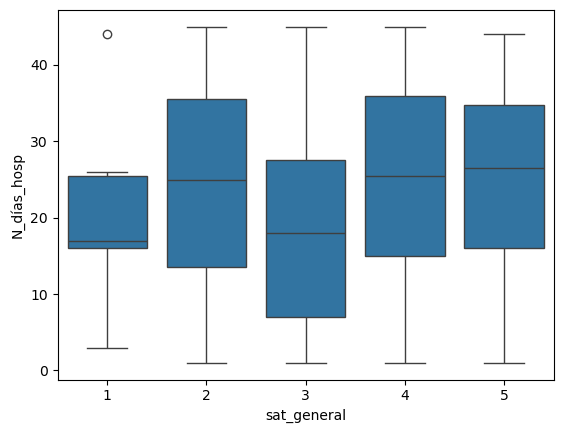

In [44]:
sns.boxplot(x = 'sat_general', y = 'N_días_hosp', data = nivel_satisfaccion)

In [45]:
#import pandas as pd
#import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

### Función 1: Separar grupos según la variable objetivo
def separar_grupos(df, var_cuantitativa, var_objetivo):
    """Separa la variable cuantitativa en dos grupos según la variable objetivo binaria"""
    grupo_0 = df[df[var_objetivo] == 0][var_cuantitativa].dropna()
    grupo_1 = df[df[var_objetivo] == 1][var_cuantitativa].dropna()
    return grupo_0, grupo_1

### Función 2: Verificar normalidad
def verificar_normalidad(grupo_0, grupo_1, var_cuantitativa):
    """Verifica la normalidad de los grupos con la prueba de Shapiro"""
    stat_0, p_valor_0 = shapiro(grupo_0)
    stat_1, p_valor_1 = shapiro(grupo_1)
    es_normal = (p_valor_0 > 0.05) and (p_valor_1 > 0.05)  # Normal si p > 0.05
    print(f"\nPrueba de normalidad (Shapiro) para {var_cuantitativa}:")
    print(f"Grupo 0: p-valor = {p_valor_0:.4f}")
    print(f"Grupo 1: p-valor = {p_valor_1:.4f}")
    return es_normal

### Función 3: Realizar prueba t de Student
def realizar_prueba_t(grupo_0, grupo_1, var_cuantitativa, var_objetivo):
    """Realiza la prueba t de Student y devuelve los resultados"""
    t_stat, p_valor = ttest_ind(grupo_0, grupo_1)
    print(f"Se utiliza la prueba t de Student porque la variable {var_cuantitativa} es normal.")
    print(f"Estadístico t: {t_stat:.4f}")
    print(f"Valor p: {p_valor:.4f}")
    return p_valor

### Función 4: Realizar prueba Mann-Whitney U
def realizar_prueba_mann_whitney(grupo_0, grupo_1, var_cuantitativa, var_objetivo):
    """Realiza la prueba Mann-Whitney U como alternativa no paramétrica"""
    u_stat, p_valor = mannwhitneyu(grupo_0, grupo_1)
    print(f"Se utiliza la prueba Mann-Whitney U porque la variable {var_cuantitativa} no es normal.")
    print(f"Estadístico U: {u_stat:.4f}")
    print(f"Valor p: {p_valor:.4f}")
    return p_valor

### Función 5: Interpretar resultados
def interpretar_resultados(p_valor, var_cuantitativa, var_objetivo, prueba, alpha=0.05):
    """Interpreta los resultados según el valor p"""
    if p_valor < alpha:
        print(f"Conclusión ({prueba}): Hay diferencia significativa en {var_cuantitativa} entre los grupos de {var_objetivo}.")
    else:
        print(f"Conclusión ({prueba}): No hay diferencia significativa en {var_cuantitativa} entre los grupos de {var_objetivo}.")

### Función principal: Analizar múltiples variables cuantitativas
def analizar_prueba_t(df, vars_cuantitativas, var_objetivo):
    """Ejecuta la prueba t o Mann-Whitney según la normalidad"""
    # Asegurarse de que vars_cuantitativas sea una lista
    if isinstance(vars_cuantitativas, str):
        vars_cuantitativas = [vars_cuantitativas]
    
    # Iterar sobre cada variable cuantitativa
    for var_cuantitativa in vars_cuantitativas:
        print(f"\n=== Análisis para {var_cuantitativa} vs {var_objetivo} ===")
        
        # Separar los grupos
        grupo_0, grupo_1 = separar_grupos(df, var_cuantitativa, var_objetivo)
        
        # Verificar que haya datos suficientes
        if len(grupo_0) < 2 or len(grupo_1) < 2:
            print(f"Advertencia: No hay suficientes datos en uno de los grupos para {var_cuantitativa}.")
            continue
        
        # Verificar normalidad
        es_normal = verificar_normalidad(grupo_0, grupo_1, var_cuantitativa)
        
        # Elegir y ejecutar la prueba adecuada
        if es_normal:
            p_valor = realizar_prueba_t(grupo_0, grupo_1, var_cuantitativa, var_objetivo)
            interpretar_resultados(p_valor, var_cuantitativa, var_objetivo, "t de Student")
        else:
            p_valor = realizar_prueba_mann_whitney(grupo_0, grupo_1, var_cuantitativa, var_objetivo)
            interpretar_resultados(p_valor, var_cuantitativa, var_objetivo, "Mann-Whitney U")



In [46]:

# Especificar las variables
variable_objetivo = 'sat_general_reclasificada'
variables_cuantitativas = ['edad', 'N_días_hosp']
    
# Ejecutar el análisis
analizar_prueba_t(nivel_satisfaccion, variables_cuantitativas, variable_objetivo)


=== Análisis para edad vs sat_general_reclasificada ===

Prueba de normalidad (Shapiro) para edad:
Grupo 0: p-valor = 0.0000
Grupo 1: p-valor = 0.0000
Se utiliza la prueba Mann-Whitney U porque la variable edad no es normal.
Estadístico U: 8367.0000
Valor p: 0.0052
Conclusión (Mann-Whitney U): Hay diferencia significativa en edad entre los grupos de sat_general_reclasificada.

=== Análisis para N_días_hosp vs sat_general_reclasificada ===

Prueba de normalidad (Shapiro) para N_días_hosp:
Grupo 0: p-valor = 0.0021
Grupo 1: p-valor = 0.0000
Se utiliza la prueba Mann-Whitney U porque la variable N_días_hosp no es normal.
Estadístico U: 9138.0000
Valor p: 0.0724
Conclusión (Mann-Whitney U): No hay diferencia significativa en N_días_hosp entre los grupos de sat_general_reclasificada.


## Análisis de la relación de variables cuantitativas sobre la satisfacción (ordinal)
- Se aplica la prueba de spearman para analizar la relación de las variables cualitativas con la variable satifacción general original la cual es una variable ordinal que va del 1 al 5.

**Correlación de Spearman**
   - **Cuándo usarla**: Si quieres medir la fuerza y dirección de la relación monotónica entre la variable cuantitativa y la ordinal, respetando el orden de esta última.
   - **Cómo funciona**: Calcula una correlación basada en rangos (rankings) de ambas variables. Es adecuada porque la variable ordinal tiene un orden natural.
   - **Interpretación**: 
     - \( \rho \) entre -1 y 1 (0 = sin relación monotónica, >0 = relación positiva, <0 = negativa).
   - **Requisitos**: No asume normalidad, solo una relación monotónica (no necesariamente lineal).
   - **Ventaja**: Aprovecha el orden de la variable ordinal.


In [47]:
#import pandas as pd
#import numpy as np
from scipy.stats import spearmanr

### Función 1: Validar datos
def validar_datos(df, var_cuantitativa, var_ordinal):
    """Valida que los datos sean adecuados para la correlación de Spearman"""
    # Verificar que no haya valores nulos
    if df[var_cuantitativa].isnull().any() or df[var_ordinal].isnull().any():
        print(f"Advertencia: Hay valores nulos en {var_cuantitativa} o {var_ordinal}. Se eliminarán para el análisis.")
        df = df.dropna(subset=[var_cuantitativa, var_ordinal])
    # Verificar que haya suficientes datos
    if len(df) < 2:
        print(f"Error: No hay suficientes datos válidos para analizar {var_cuantitativa} vs {var_ordinal}.")
        return None
    return df

### Función 2: Calcular correlación de Spearman
def calcular_spearman(df, var_cuantitativa, var_ordinal):
    """Calcula la correlación de Spearman entre una variable cuantitativa y una ordinal"""
    corr, p_valor = spearmanr(df[var_cuantitativa], df[var_ordinal])
    print(f"\nCorrelación de Spearman para {var_cuantitativa} vs {var_ordinal}:")
    print(f"Coeficiente de correlación (rho): {corr:.4f}")
    print(f"Valor p: {p_valor:.4f}")
    return corr, p_valor

### Función 3: Interpretar resultados
def interpretar_resultados(corr, p_valor, var_cuantitativa, var_ordinal, alpha=0.05):
    """Interpreta los resultados de la correlación de Spearman"""
    if p_valor < alpha:
        print(f"Conclusión: Hay una relación monotónica significativa entre {var_cuantitativa} y {var_ordinal}.")
        if corr > 0:
            print(f"La relación es positiva: a mayor {var_cuantitativa}, mayor {var_ordinal}.")
        elif corr < 0:
            print(f"La relación es negativa: a mayor {var_cuantitativa}, menor {var_ordinal}.")
    else:
        print(f"Conclusión: No hay una relación monotónica significativa entre {var_cuantitativa} y {var_ordinal}.")

### Función principal: Analizar múltiples variables cuantitativas
def analizar_spearman(df, vars_cuantitativas, var_ordinal):
    """Ejecuta la correlación de Spearman para una o varias variables cuantitativas"""
    # Asegurarse de que vars_cuantitativas sea una lista
    if isinstance(vars_cuantitativas, str):
        vars_cuantitativas = [vars_cuantitativas]
    
    # Iterar sobre cada variable cuantitativa
    for var_cuantitativa in vars_cuantitativas:
        print(f"\n=== Análisis para {var_cuantitativa} vs {var_ordinal} ===")
        
        # Validar los datos
        df_valido = validar_datos(df, var_cuantitativa, var_ordinal)
        if df_valido is None:
            continue
        
        # Calcular la correlación de Spearman
        corr, p_valor = calcular_spearman(df_valido, var_cuantitativa, var_ordinal)
        
        # Interpretar los resultados
        interpretar_resultados(corr, p_valor, var_cuantitativa, var_ordinal)



In [48]:
# Prueba de spearman
    
# Especificar las variables
variable_ordinal = 'sat_general'
variables_cuantitativas = ['edad', 'N_días_hosp']
    
# Ejecutar el análisis
analizar_spearman(nivel_satisfaccion, variables_cuantitativas, variable_ordinal)


=== Análisis para edad vs sat_general ===

Correlación de Spearman para edad vs sat_general:
Coeficiente de correlación (rho): 0.1353
Valor p: 0.0124
Conclusión: Hay una relación monotónica significativa entre edad y sat_general.
La relación es positiva: a mayor edad, mayor sat_general.

=== Análisis para N_días_hosp vs sat_general ===

Correlación de Spearman para N_días_hosp vs sat_general:
Coeficiente de correlación (rho): 0.0890
Valor p: 0.1009
Conclusión: No hay una relación monotónica significativa entre N_días_hosp y sat_general.


Análisis
- Consideran la variable satisfacción general como una variable binaria, de acuerdo a la prueba de Mann-Whitney U, hay diferencia significativa en edad entre los grupos de sat_general_reclasificada. Por otro lado, con el mismo método estadístico, no hay diferencia significativa en N_días_hosp entre los grupos de sat_general_reclasificada.
- Considerando la variable satisfacción general como una variable ordinal del 1 al 5, hay una relación monotónica significativa entre edad y sat_general. La relación es positiva: a mayor edad, mayor sat_general. Por otra parte, no hay una relación monotónica significativa entre N_días_hosp y sat_general.
- La variable edad presenta una relación significativa con la satisfacción general, por lo que se considera relevante para explicar la satisfacción general.
- N_días_hosp no presenta una relación significativa con la satisfacción general, por lo que no se considera relevante para explicar la satisfacción general.

## Selección de variables
A partir del análisis de information value, weight of evidence y pruebas estadísticas, tanto para variables cualitativas como cuantitativas, se procede a seleccionar las variables relevantes que serán incluidas en el modelo predictivo. 

In [49]:
data_selected_variables = nivel_satisfaccion.copy()

In [54]:
data_selected_variables = data_selected_variables.drop(columns = ['sexo', 'medicion', 
                                                                  'Procedencia', 'Tipo_hospitalización',
                                                                  'N_días_hosp','N_dias_hosp_escalada',
                                                                  'edad' # Se elimina la variable edad con tal de solo
                                                                  # considerar la varialbe edad_escalada la cual es más adecuada para
                                                                  # el modelo
                                                                  ])

In [55]:
data_selected_variables.columns

Index(['rango_edad', 'sat_general', 'sat1', 'sat2', 'sat3', 'sat4', 'sat5',
       'sat6', 'sat7', 'sat8', 'edad_escalada', 'sat_general_reclasificada'],
      dtype='object')

# 7. Modelado predictivo
- Se emplea un modelo de regresión logística ordinal teniendo como variable objetivo la satisfacción general (valores de escala del 1 al 5) y la satisfacción general reclasificada (binaria), se prueba para ambos casos.

In [ ]:
#!pip install mord

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9898 sha256=8e6863b43feb032d81971e3cf3935ed0f7d5ac8a857d8fd1bb8defb12e73fc69
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\80\3e\3b\13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


## Regresión logística ordinal - target: sat_general

Accuracy: 0.4782608695652174

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.43      0.38      0.40         8
           3       0.40      0.29      0.33         7
           4       0.52      0.65      0.58        34
           5       0.40      0.32      0.35        19

    accuracy                           0.48        69
   macro avg       0.35      0.32      0.33        69
weighted avg       0.46      0.48      0.46        69


Matriz de Confusión:
 [[ 0  1  0  0  0]
 [ 0  3  1  4  0]
 [ 0  1  2  3  1]
 [ 0  2  2 22  8]
 [ 0  0  0 13  6]]

Interpretación de Coeficientes y Odds Ratios:
        Variable  Coeficiente  Odds Ratio
2           sat2     0.901368    2.462971
8           sat8     0.716056    2.046347
3           sat3     0.469821    1.599708
7           sat7     0.353631    1.424230
1           sat1     0.296677    1.345381
5           sat5     0.285863    1.330911
0 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


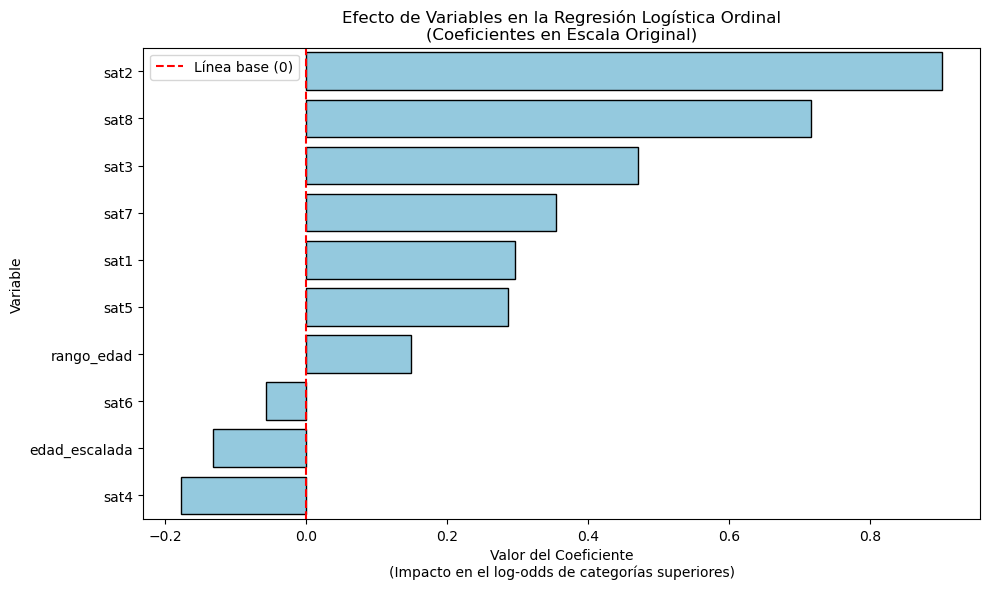

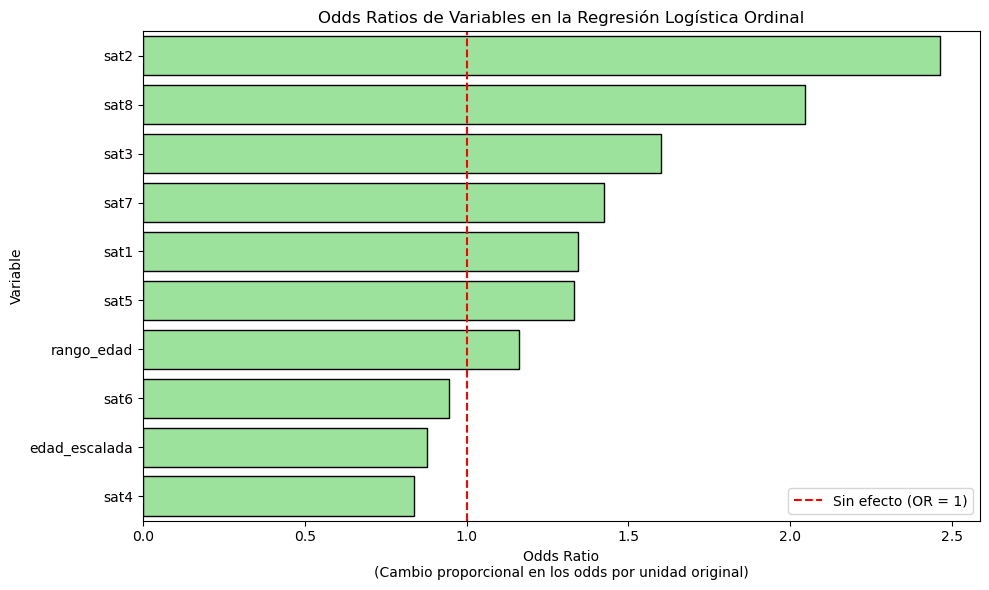


Notas:
- Los coeficientes indican el cambio en el log-odds de estar en una categoría superior por cada unidad en la variable (en su escala original).
- Los odds ratios (e^coef) muestran el cambio proporcional en los odds. OR > 1 indica mayor probabilidad de categorías superiores; OR < 1, lo opuesto.
- Al no estandarizar, el tamaño de los coeficientes depende de la escala de cada variable, lo que dificulta comparar su impacto relativo.
- Limitación: Este modelo no proporciona p-valores para evaluar significancia estadística.


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mord import LogisticAT  # Regresión logística ordinal
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = data_selected_variables.drop(columns=['sat_general', 'sat_general_reclasificada'])
y = data_selected_variables['sat_general']

# 2. Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Entrenar modelo de Regresión Logística Ordinal
model = LogisticAT(alpha=1.0)  # alpha es el parámetro de regularización
model.fit(X_train, y_train)

# 4. Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 6. Extraer coeficientes y calcular odds ratios
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_,
    'Odds Ratio': np.exp(model.coef_)  # Exponenciar para obtener odds ratios
})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar tabla de coeficientes y odds ratios
print("\nInterpretación de Coeficientes y Odds Ratios:")
print(coef_df)

# 7. Visualización de coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Línea base (0)')
plt.title('Efecto de Variables en la Regresión Logística Ordinal\n(Coeficientes en Escala Original)')
plt.xlabel('Valor del Coeficiente\n(Impacto en el log-odds de categorías superiores)')
plt.ylabel('Variable')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualización de odds ratios
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Variable', data=coef_df, color='lightgreen', edgecolor='black')
plt.axvline(x=1, color='red', linestyle='--', label='Sin efecto (OR = 1)')
plt.title('Odds Ratios de Variables en la Regresión Logística Ordinal')
plt.xlabel('Odds Ratio\n(Cambio proporcional en los odds por unidad original)')
plt.ylabel('Variable')
plt.legend()
plt.tight_layout()
plt.show()

# Nota sobre interpretación
print("\nNotas:")
print("- Los coeficientes indican el cambio en el log-odds de estar en una categoría superior por cada unidad en la variable (en su escala original).")
print("- Los odds ratios (e^coef) muestran el cambio proporcional en los odds. OR > 1 indica mayor probabilidad de categorías superiores; OR < 1, lo opuesto.")
print("- Al no estandarizar, el tamaño de los coeficientes depende de la escala de cada variable, lo que dificulta comparar su impacto relativo.")
print("- Limitación: Este modelo no proporciona p-valores para evaluar significancia estadística.")

## Regresión logística ordinal - target: sat_general_reclasificada

Accuracy: 0.8115942028985508

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.84      0.92      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.68      0.70        69
weighted avg       0.80      0.81      0.80        69


Matriz de Confusión:
 [[ 7  9]
 [ 4 49]]

Interpretación de Coeficientes y Odds Ratios:
        Variable  Coeficiente  Odds Ratio
2           sat2     1.163649    3.201596
8           sat8     0.503343    1.654242
5           sat5     0.458634    1.581912
7           sat7     0.375992    1.456435
1           sat1     0.371408    1.449775
0     rango_edad     0.302379    1.353074
9  edad_escalada     0.097270    1.102158
3           sat3    -0.041883    0.958982
6           sat6    -0.097315    0.907270
4           sat4    -0.323057    0.723933


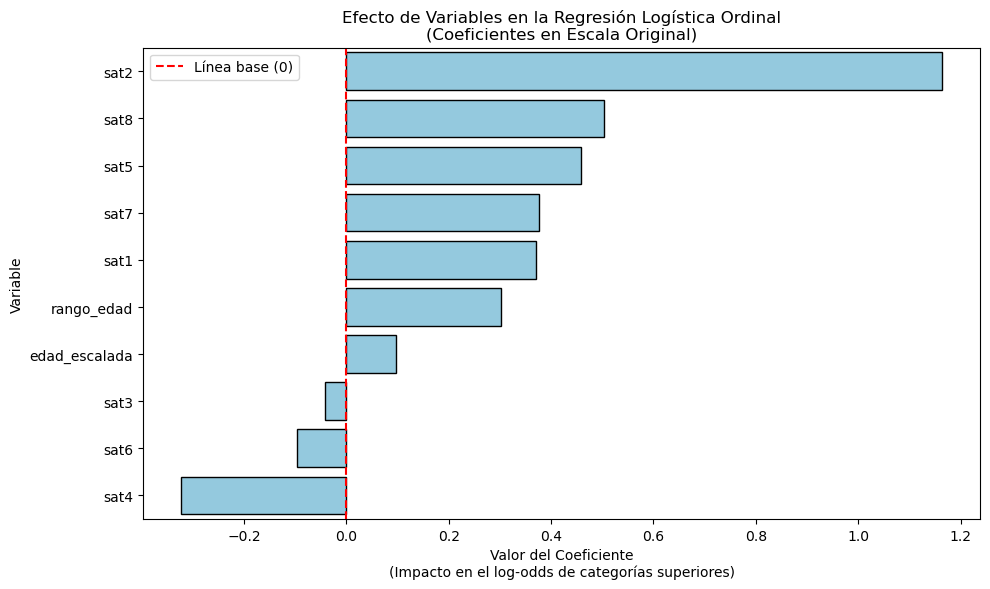

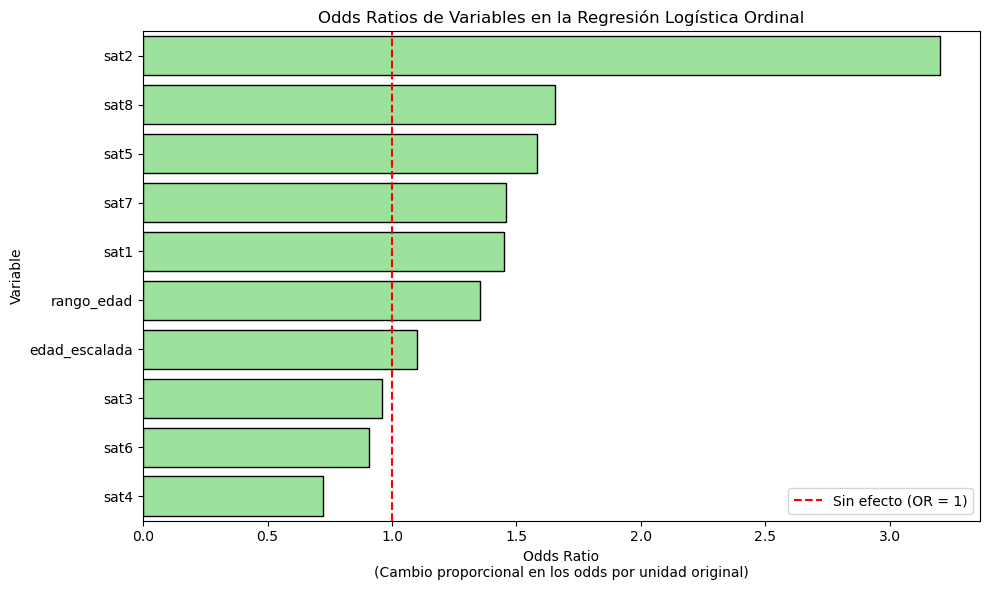


Notas:
- Los coeficientes indican el cambio en el log-odds de estar en una categoría superior por cada unidad en la variable (en su escala original).
- Los odds ratios (e^coef) muestran el cambio proporcional en los odds. OR > 1 indica mayor probabilidad de categorías superiores; OR < 1, lo opuesto.
- Al no estandarizar, el tamaño de los coeficientes depende de la escala de cada variable, lo que dificulta comparar su impacto relativo.
- Limitación: Este modelo no proporciona p-valores para evaluar significancia estadística.


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mord import LogisticAT  # Regresión logística ordinal
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = data_selected_variables.drop(columns=['sat_general', 'sat_general_reclasificada'])
y = data_selected_variables['sat_general_reclasificada']

# 2. Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Entrenar modelo de Regresión Logística Ordinal
model = LogisticAT(alpha=1.0)  # alpha es el parámetro de regularización
model.fit(X_train, y_train)

# 4. Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 5. Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 6. Extraer coeficientes y calcular odds ratios
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_,
    'Odds Ratio': np.exp(model.coef_)  # Exponenciar para obtener odds ratios
})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar tabla de coeficientes y odds ratios
print("\nInterpretación de Coeficientes y Odds Ratios:")
print(coef_df)

# 7. Visualización de coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Línea base (0)')
plt.title('Efecto de Variables en la Regresión Logística Ordinal\n(Coeficientes en Escala Original)')
plt.xlabel('Valor del Coeficiente\n(Impacto en el log-odds de categorías superiores)')
plt.ylabel('Variable')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualización de odds ratios
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Variable', data=coef_df, color='lightgreen', edgecolor='black')
plt.axvline(x=1, color='red', linestyle='--', label='Sin efecto (OR = 1)')
plt.title('Odds Ratios de Variables en la Regresión Logística Ordinal')
plt.xlabel('Odds Ratio\n(Cambio proporcional en los odds por unidad original)')
plt.ylabel('Variable')
plt.legend()
plt.tight_layout()
plt.show()

# Nota sobre interpretación
print("\nNotas:")
print("- Los coeficientes indican el cambio en el log-odds de estar en una categoría superior por cada unidad en la variable (en su escala original).")
print("- Los odds ratios (e^coef) muestran el cambio proporcional en los odds. OR > 1 indica mayor probabilidad de categorías superiores; OR < 1, lo opuesto.")
print("- Al no estandarizar, el tamaño de los coeficientes depende de la escala de cada variable, lo que dificulta comparar su impacto relativo.")
print("- Limitación: Este modelo no proporciona p-valores para evaluar significancia estadística.")

### Otra librería para poder determinar la significancia de las variables (p-value)

Optimization terminated successfully.
         Current function value: 0.364607
         Iterations: 61
         Function evaluations: 64
         Gradient evaluations: 64
Accuracy train: 0.8676470588235294
Accuracy test: 0.8115942028985508

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.84      0.92      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.68      0.70        69
weighted avg       0.80      0.81      0.80        69


Matriz de Confusión:
 [[ 7  9]
 [ 4 49]]

Resultados e Interpretación de Variables:
                    Variable  Coeficiente  Odds Ratio       P-valor  \
sat2                    sat2     1.248595    3.485444  8.742740e-07   
sat8                    sat8     0.534376    1.706382  5.574473e-03   
edad_escalada  edad_escalada     0.493240    1.637613  8.514970e-01   
sat5                    sat5     0.484

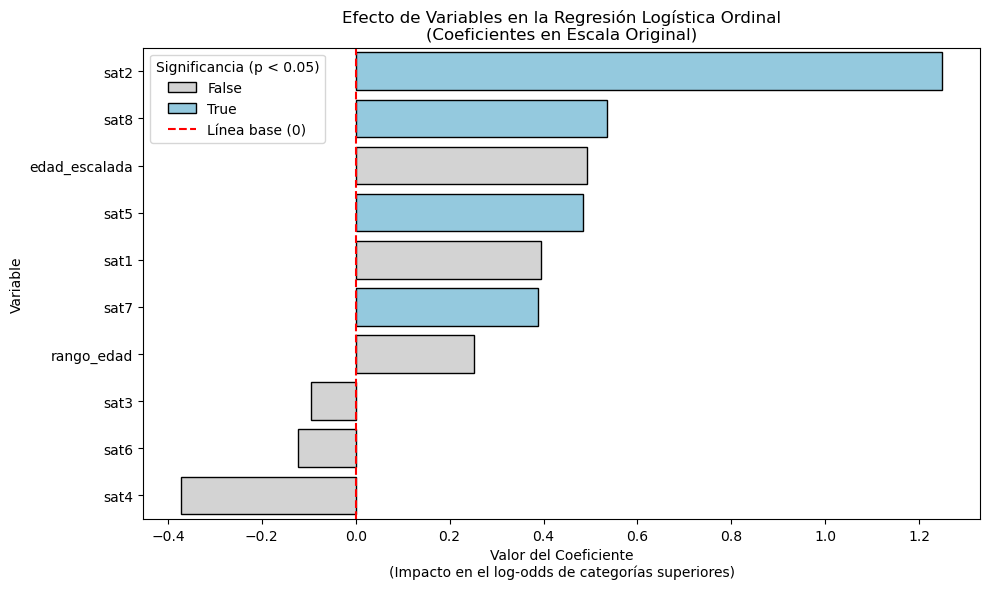

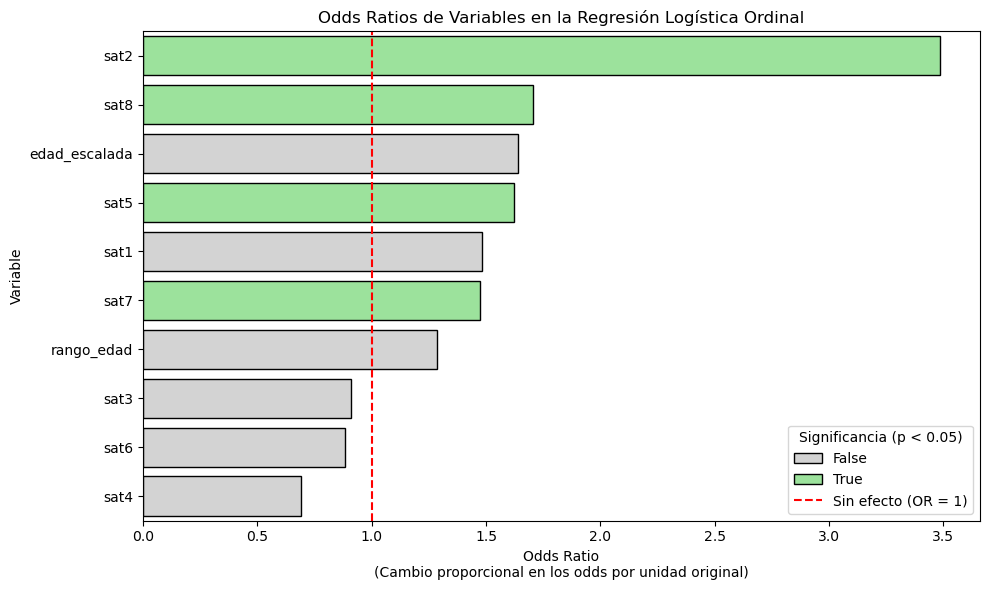


Notas:
- Coeficientes: Cambio en el log-odds de estar en una categoría superior por unidad en la variable.
- Odds Ratios: Cambio proporcional en los odds (OR > 1: aumento; OR < 1: disminución).
- Significancia: P-valor < 0.05 indica un efecto estadísticamente significativo.
- Las variables están en su escala original (no estandarizadas).


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = data_selected_variables.drop(columns=['sat_general', 'sat_general_reclasificada'])
y = data_selected_variables['sat_general_reclasificada']

# 2. Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Ajustar modelo de regresión logística ordinal con statsmodels
model = OrderedModel(y_train, X_train, distr='logit')
result = model.fit(method='bfgs')

# 4. Predicciones en el conjunto de entrenamiento
probs_train = result.predict(X_train)
y_pred_train = np.argmax(probs_train, axis=1)


# 4. Predicciones en el conjunto de prueba
probs = result.predict(X_test)
y_pred = np.argmax(probs, axis=1)

# 5. Evaluación del modelo
print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 6. Extraer coeficientes, odds ratios y significancia
# Los coeficientes de las variables están al inicio de result.params, seguidos por los umbrales
n_vars = X_train.shape[1]  # Número de variables predictoras
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': result.params[:n_vars],  # Solo los coeficientes de las variables
    'Odds Ratio': np.exp(result.params[:n_vars]),  # Odds ratios correspondientes
    'P-valor': result.pvalues[:n_vars],  # P-valores de las variables
    'Error Estándar': result.bse[:n_vars]  # Errores estándares de las variables
})
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar tabla de resultados
print("\nResultados e Interpretación de Variables:")
print(coef_df)

# 7. Interpretación automática de los resultados
print("\nInterpretación de los Resultados:")
for index, row in coef_df.iterrows():
    var = row['Variable']
    coef = row['Coeficiente']
    odds_ratio = row['Odds Ratio']
    pval = row['P-valor']
    sig = "significativo" if pval < 0.05 else "no significativo"
    
    print(f"- {var}:")
    print(f"  Coeficiente = {coef:.3f} (log-odds cambia en {coef:.3f} por unidad)")
    print(f"  Odds Ratio = {odds_ratio:.3f} (odds cambian en {odds_ratio:.3f} por unidad)")
    print(f"  P-valor = {pval:.3f} ({sig} al 5%)")

# 8. Visualización de coeficientes con significancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', hue=[p < 0.05 for p in coef_df['P-valor']], 
            data=coef_df, palette={True: 'skyblue', False: 'lightgrey'}, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Línea base (0)')
plt.title('Efecto de Variables en la Regresión Logística Ordinal\n(Coeficientes en Escala Original)')
plt.xlabel('Valor del Coeficiente\n(Impacto en el log-odds de categorías superiores)')
plt.ylabel('Variable')
plt.legend(title='Significancia (p < 0.05)', loc='best')
plt.tight_layout()
plt.show()

# 9. Visualización de odds ratios
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Variable', hue=[p < 0.05 for p in coef_df['P-valor']], 
            data=coef_df, palette={True: 'lightgreen', False: 'lightgrey'}, edgecolor='black')
plt.axvline(x=1, color='red', linestyle='--', label='Sin efecto (OR = 1)')
plt.title('Odds Ratios de Variables en la Regresión Logística Ordinal')
plt.xlabel('Odds Ratio\n(Cambio proporcional en los odds por unidad original)')
plt.ylabel('Variable')
plt.legend(title='Significancia (p < 0.05)', loc='best')
plt.tight_layout()
plt.show()

# Notas finales
print("\nNotas:")
print("- Coeficientes: Cambio en el log-odds de estar en una categoría superior por unidad en la variable.")
print("- Odds Ratios: Cambio proporcional en los odds (OR > 1: aumento; OR < 1: disminución).")
print("- Significancia: P-valor < 0.05 indica un efecto estadísticamente significativo.")
print("- Las variables están en su escala original (no estandarizadas).")

### Revisión de otros modelos de predicción

In [65]:
#!pip install xgboost
#!pip install lightgbm

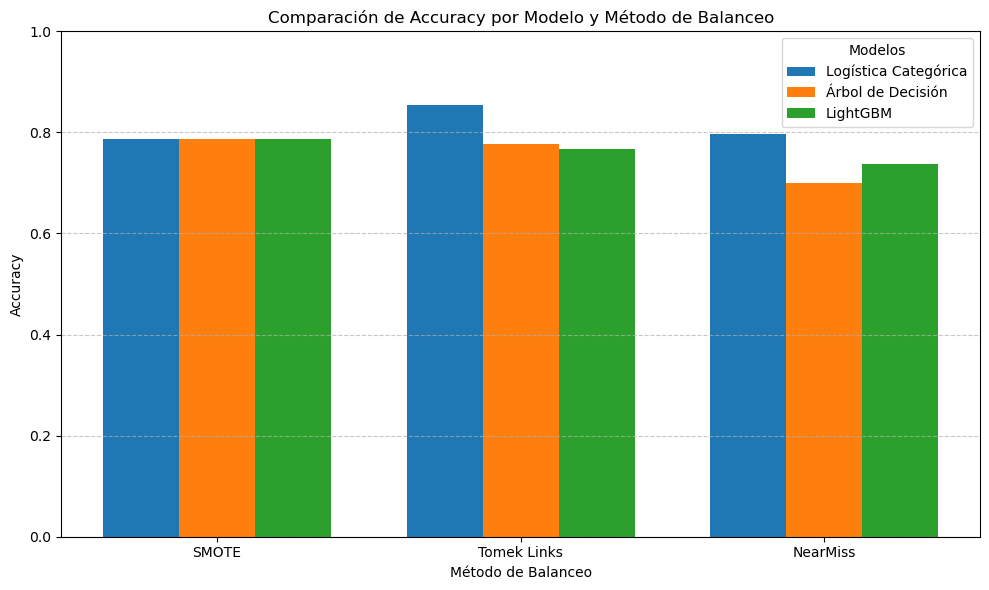

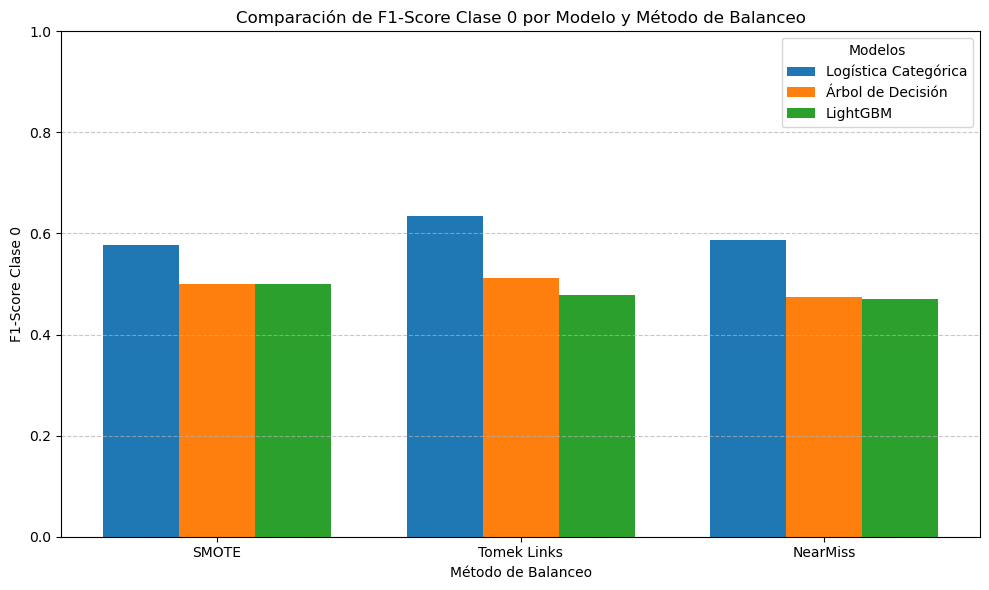

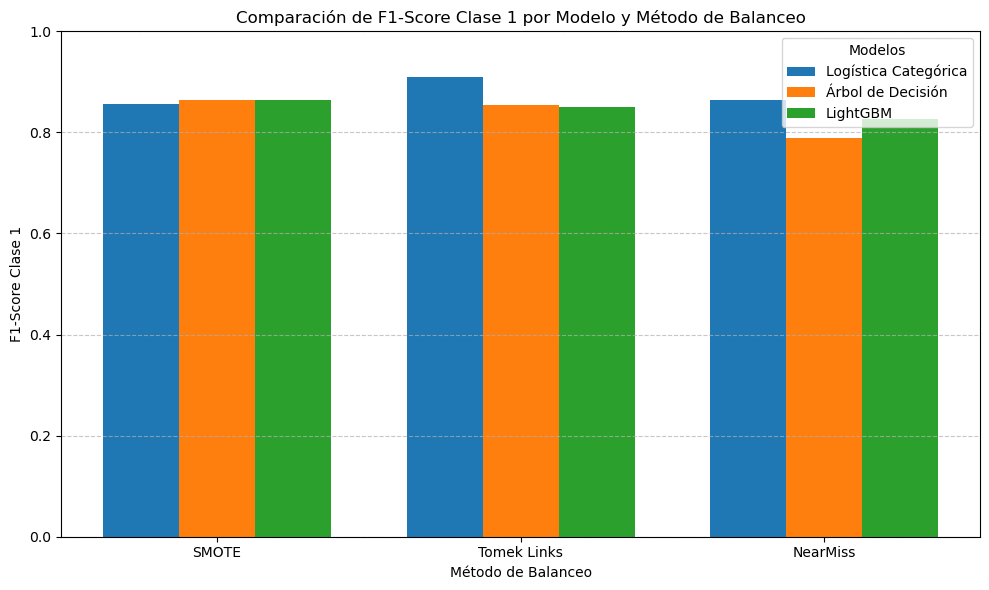


=== Comparación de Accuracy ===
             Logística Categórica  Árbol de Decisión  LightGBM
SMOTE                       0.786              0.786     0.786
Tomek Links                 0.854              0.777     0.767
NearMiss                    0.796              0.699     0.738

=== Comparación de F1-Score Clase 0 ===
             Logística Categórica  Árbol de Decisión  LightGBM
SMOTE                       0.577              0.500     0.500
Tomek Links                 0.634              0.511     0.478
NearMiss                    0.588              0.475     0.471

=== Comparación de F1-Score Clase 1 ===
             Logística Categórica  Árbol de Decisión  LightGBM
SMOTE                       0.857              0.864     0.864
Tomek Links                 0.909              0.855     0.850
NearMiss                    0.865              0.789     0.826


In [71]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE
from mord import LogisticAT
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Separar variables predictoras (X) y variable objetivo (y)
X = data_selected_variables.drop(columns=['sat_general', 'sat_general_reclasificada'])
y = data_selected_variables['sat_general_reclasificada']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Técnicas de balanceo
balancing_methods = {
    "SMOTE": SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3),
    "Tomek Links": TomekLinks(),
    "NearMiss": NearMiss(version=3)
}

# Modelos a entrenar
models = {
    "Logística Categórica": LogisticAT(alpha=1.0),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "LightGBM": LGBMClassifier(objective='multiclass', num_class=5, random_state=42, verbose=-1)
}

# Almacenar resultados
results = {
    "Accuracy": {},
    "F1-Score Clase 0": {},
    "F1-Score Clase 1": {}
}

# Entrenar y evaluar modelos
for method_name, balancer in balancing_methods.items():
    X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)
    acc_dict = {}
    f1_0_dict = {}
    f1_1_dict = {}
    
    for model_name, model in models.items():
        model.fit(X_train_bal, y_train_bal)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        acc_dict[model_name] = accuracy
        f1_0_dict[model_name] = report['0']['f1-score']
        f1_1_dict[model_name] = report['1']['f1-score']
    
    results["Accuracy"][method_name] = acc_dict
    results["F1-Score Clase 0"][method_name] = f1_0_dict
    results["F1-Score Clase 1"][method_name] = f1_1_dict

# Convertir a DataFrames con nombres explícitos
model_names = list(models.keys())
accuracy_df = pd.DataFrame.from_dict(results["Accuracy"], orient='index', columns=model_names).round(3)
f1_0_df = pd.DataFrame.from_dict(results["F1-Score Clase 0"], orient='index', columns=model_names).round(3)
f1_1_df = pd.DataFrame.from_dict(results["F1-Score Clase 1"], orient='index', columns=model_names).round(3)

# Configuración para gráficos
methods = list(balancing_methods.keys())
n_models = len(model_names)
n_methods = len(methods)
bar_width = 0.25
index = np.arange(n_methods)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Azul, naranja, verde

# Gráfico 1: Accuracy
plt.figure(figsize=(10, 6))
for i, model in enumerate(model_names):
    plt.bar(index + i * bar_width, accuracy_df[model], bar_width, label=model, color=colors[i])
plt.title('Comparación de Accuracy por Modelo y Método de Balanceo', fontsize=12)
plt.xlabel('Método de Balanceo')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width, methods)
plt.ylim(0, 1)
plt.legend(title='Modelos')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 2: F1-Score Clase 0
plt.figure(figsize=(10, 6))
for i, model in enumerate(model_names):
    plt.bar(index + i * bar_width, f1_0_df[model], bar_width, label=model, color=colors[i])
plt.title('Comparación de F1-Score Clase 0 por Modelo y Método de Balanceo', fontsize=12)
plt.xlabel('Método de Balanceo')
plt.ylabel('F1-Score Clase 0')
plt.xticks(index + bar_width, methods)
plt.ylim(0, 1)
plt.legend(title='Modelos')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico 3: F1-Score Clase 1
plt.figure(figsize=(10, 6))
for i, model in enumerate(model_names):
    plt.bar(index + i * bar_width, f1_1_df[model], bar_width, label=model, color=colors[i])
plt.title('Comparación de F1-Score Clase 1 por Modelo y Método de Balanceo', fontsize=12)
plt.xlabel('Método de Balanceo')
plt.ylabel('F1-Score Clase 1')
plt.xticks(index + bar_width, methods)
plt.ylim(0, 1)
plt.legend(title='Modelos')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opcional: Mostrar tablas
print("\n=== Comparación de Accuracy ===")
print(accuracy_df)
print("\n=== Comparación de F1-Score Clase 0 ===")
print(f1_0_df)
print("\n=== Comparación de F1-Score Clase 1 ===")
print(f1_1_df)

- Análisis del mejor modelo de predicción
El mejor modelo de predicción es la regresión logística ordinal con la variable objetivo sat_general_reclasificada bajo el método de balanceo Tomek links, dado que presenta la mayor precisión, y mayores valores de F1-Score tanto para la clase 0 y 1.       

## 8. Conclusiones

- El nivel de satisfacción se encuentra por debajo del 80%, siendo que de la muestra realizada solo el 76.2% se encuentra satisfecho.
- Se determinó que el sexo no es una variable relevante para explicar la satisfacción general de los pacientes del hospital EsSalud Alberto Barton.
- De acuerdo con los resultados del modelo de regresión logística ordinal con la variable objetivo satisfacción_general_reclasificada, que las variables sat2, sat8, sat5 y sat7 muestran una significancia estadística para explicar la satisfacción general, además de por cada aumento en sus valores aumentan la probabilidad de aumentar el nivel de satifacción (pasar de no satisfecho a satisfecho). 




A partir de las variables relevantes idenficadas se proponen las siguientes recomendaciones para mejorar la satisfacción de los pacientes en el hospital EsSalud Alberto Barton:

#### 1. Mejorar la calidad y capacitación del personal técnico
   - **Capacitación continua**: Implementar programas regulares de formación para el personal técnico (enfermeras, técnicos de laboratorio, etc.) enfocados en habilidades interpersonales, empatía y trato humano, además de competencias técnicas. Esto puede incluir talleres sobre comunicación efectiva y manejo de situaciones emocionalmente sensibles.
   - **Reconocimiento y motivación**: Establecer un sistema de incentivos o reconocimientos para el personal técnico que reciba altas valoraciones de los pacientes, fomentando un ambiente de trabajo positivo y motivador.
   - **Evaluación de desempeño**: Realizar encuestas internas o auditorías periódicas para identificar áreas de mejora específicas en el trato del personal técnico, ajustando las capacitaciones según retroalimentación.

#### 2. Optimizar la puntualidad en el servicio de comida
   - **Revisión de procesos logísticos**: Analizar la cadena de suministro y preparación de alimentos para identificar cuellos de botella que afecten la puntualidad (ej. retrasos en cocina, transporte o coordinación con los horarios de los pacientes).
   - **Horarios predecibles**: Establecer y comunicar horarios claros de entrega de comidas, asegurando que se cumplan consistentemente. Por ejemplo, fijar ventanas de tiempo específicas (8:00-8:30 para desayunos) y monitorear su cumplimiento.
   - **Calidad y presentación**: Además de la puntualidad, mejorar la calidad nutricional y la presentación de los alimentos, ya que esto puede influir indirectamente en la percepción del servicio.

#### 3. Ajustar los horarios de visita para mayor flexibilidad y claridad
   - **Encuestas a pacientes y familias**: Consultar a los pacientes y sus acompañantes sobre los horarios de visita más convenientes, buscando un equilibrio entre las necesidades operativas del hospital y la comodidad de los visitantes.
   - **Ampliación estratégica**: Considerar extender o flexibilizar los horarios (ej. permitir visitas cortas adicionales en la tarde o fines de semana) si los actuales son percibidos como restrictivos.
   - **Comunicación efectiva**: Asegurarse de que los horarios estén bien señalizados (en habitaciones, folletos, página web) y que el personal informe claramente a las familias para evitar confusiones o frustraciones.

#### 4. Mejorar la claridad de las indicaciones médicas
   - **Capacitación en comunicación para médicos**: Ofrecer talleres a los médicos sobre cómo explicar diagnósticos, tratamientos y cuidados post-hospitalarios de manera sencilla, evitando jerga técnica innecesaria y verificando que el paciente comprenda (ej. usando la técnica "enseñar de vuelta", donde el paciente repite lo entendido).
   - **Material de apoyo**: Proporcionar a los pacientes folletos, diagramas o videos cortos con instrucciones claras sobre su tratamiento, horarios de medicación o cuidados en casa, reforzando lo dicho verbalmente.
   - **Tiempo dedicado**: Asegurarse de que los médicos tengan suficiente tiempo en sus consultas para responder preguntas, ajustando horarios o reduciendo cargas administrativas si es necesario.

#### Recomendaciones generales
- **Monitoreo continuo**: Implementar encuestas breves y regulares (ej. al alta o por mensaje post-visita) para medir la satisfacción en estos cuatro aspectos específicos y ajustar las estrategias según los resultados.
- **Equipo interdisciplinario**: Crear un comité con representantes del personal técnico, cocina, administración y médicos para coordinar mejoras en estas áreas de manera integrada.
- **Priorización basada en impacto**: Si los recursos son limitados, enfocar primero en el factor con mayor influencia (según los coeficientes del modelo), como podría ser el personal técnico o la claridad médica, y luego escalar a los demás.
